In [11]:
import pandas as pd 
import yfinance as yf
import matplotlib.pyplot as plt 
pd.options.mode.chained_assignment = None

In [12]:
tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_BSE_SENSEX_companies')[0]

In [18]:
tickers = tickers.Symbol.to_list()

In [21]:
def RSIcalc(asset):
    df = yf.download(asset, start='2011-01-01')
    df['MA200'] = df['Adj Close'].rolling(200).mean()
    df['price change'] = df['Adj Close'].pct_change()
    df['Upmove'] = df['price change'].apply(lambda x : x if x > 0 else 0)
    df['Downmove'] = df['price change'].apply(lambda x : abs(x) if x < 0 else 0)
    df['avg up'] = df['Upmove'].ewm(span=19).mean()
    df['avg down'] = df['Downmove'].ewm(span=19).mean()
    df = df.dropna()
    df['RS'] = df['avg up']/df['avg down']
    df['RSI'] = df['RS'].apply(lambda x : 100-(100/(x+1)))
    df.loc[(df['Adj Close'] > df['MA200']) & (df['RSI'] < 30), 'Buy'] = 'Yes'
    df.loc[(df['Adj Close'] < df['MA200']) | (df['RSI'] > 30), 'Buy'] = 'No'
    return df    

In [34]:
def getSignals(df):
    Buying_dates = []
    Selling_dates = []
    
    for i in range(len(df) - 11):
        if 'Yes' in df['Buy'].iloc[i]:
            Buying_dates.append(df.iloc[i+1].name) 
            for j in range(1,11):
                if df['RSI'].iloc[i+j] > 40:
                    Selling_dates.append(df.iloc[i+j+1].name)
                    break
                elif j ==10:
                    Selling_dates.append(df.iloc[i+j+1].name)
                    
    return Buying_dates, Selling_dates

In [35]:
frame = RSIcalc(tickers[0])
buy, sell = getSignals(frame)

[*********************100%***********************]  1 of 1 completed


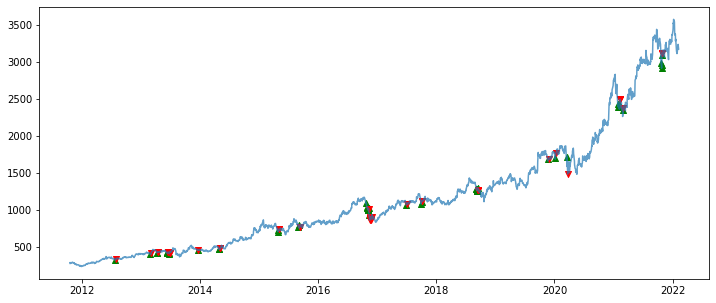

In [36]:
plt.figure(figsize=(12,5))
plt.scatter(frame.loc[buy].index, frame.loc[buy]['Adj Close'], marker='^', c='g')
plt.scatter(frame.loc[sell].index, frame.loc[sell]['Adj Close'], marker='v', c='red')
plt.plot(frame['Adj Close'], alpha=0.7)

In [37]:
Profits = (frame.loc[sell].Open.values - frame.loc[buy].Open.values)/frame.loc[buy].Open.values

In [38]:
Profits

array([ 0.02029153,  0.03510465,  0.02123557,  0.02130271,  0.00631573,
        0.01064542,  0.02060473,  0.01946311,  0.0260181 ,  0.03775744,
        0.02674897,  0.02175647,  0.01992429,  0.00827839,  0.03961058,
       -0.00848485,  0.00738916, -0.09292035, -0.10599078, -0.14325581,
       -0.12595886, -0.12264151, -0.11019195, -0.1398157 , -0.12044607,
       -0.05      ,  0.01631913,  0.01324675,  0.02031802,  0.01591419,
        0.00060145,  0.00301432,  0.01572037,  0.02384615,  0.02621434,
        0.03939709,  0.02581602,  0.03787388, -0.05446158,  0.04245988,
        0.02905323,  0.04004107,  0.0631822 ,  0.03473758,  0.04328859,
        0.05708745,  0.06545579,  0.02863573])

In [39]:
wins = [i for i in Profits if i > 0]

In [40]:
len(wins)/len(Profits)

0.7708333333333334

In [41]:
matrixsingals = []
matrixprofits = []

for i in range(len(tickers)):
    frame = RSIcalc(tickers[i])
    buy, sell = getSignals(frame)
    Profits = (frame.loc[sell].Open.values - frame.loc[buy].Open.values)/frame.loc[buy].Open.values
    matrixsingals.append(buy)
    matrixprofits.append(Profits)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [42]:
matrixprofits

[array([ 0.02029153,  0.03510465,  0.02123557,  0.02130271,  0.00631573,
         0.01064542,  0.02060473,  0.01946311,  0.0260181 ,  0.03775744,
         0.02674897,  0.02175647,  0.01992429,  0.00827839,  0.03961058,
        -0.00848485,  0.00738916, -0.09292035, -0.10599078, -0.14325581,
        -0.12595886, -0.12264151, -0.11019195, -0.1398157 , -0.12044607,
        -0.05      ,  0.01631913,  0.01324675,  0.02031802,  0.01591419,
         0.00060145,  0.00301432,  0.01572037,  0.02384615,  0.02621434,
         0.03939709,  0.02581602,  0.03787388, -0.05446158,  0.04245988,
         0.02905323,  0.04004107,  0.0631822 ,  0.03473758,  0.04328859,
         0.05708745,  0.06545579,  0.02863573]),
 array([ 0.01614136,  0.00746834, -0.00419285,  0.01063832,  0.03054543,
        -0.05542897,  0.03903149,  0.04096151, -0.03557778, -0.03800033,
         0.02933842,  0.02776182,  0.02472084,  0.02380286,  0.031572  ,
         0.04866664, -0.00246918, -0.03647842, -0.10611561, -0.08590926,
  

In [43]:
len(matrixprofits)

30

In [44]:
allprofits = []

for i in matrixprofits:
    for e in i:
        allprofits.append(e)

In [45]:
allprofits

[0.020291529658088864,
 0.03510465400163518,
 0.021235569006269644,
 0.021302711595308606,
 0.006315731587910796,
 0.010645416667822892,
 0.020604730586856104,
 0.01946311455711689,
 0.026018099547511313,
 0.03775743707093822,
 0.026748971193415638,
 0.021756474843282185,
 0.019924287949010168,
 0.008278391690818357,
 0.03961057974200965,
 -0.008484848484848486,
 0.007389162561576354,
 -0.09292035398230089,
 -0.10599078341013825,
 -0.14325581395348838,
 -0.12595886287564312,
 -0.12264150943396226,
 -0.11019195175571989,
 -0.13981570289638037,
 -0.12044606646829704,
 -0.05,
 0.016319129646418858,
 0.013246754331546989,
 0.020318021201413426,
 0.01591418936565087,
 0.0006014500507387447,
 0.003014318010550113,
 0.015720371796504398,
 0.023846153846153847,
 0.026214340786430222,
 0.039397094411142676,
 0.025816023738872405,
 0.03787388006940493,
 -0.054461579395402936,
 0.0424598753564854,
 0.02905323039414872,
 0.04004106776180698,
 0.06318219983207389,
 0.034737576171213674,
 0.04328859

In [46]:
wins = [i for i in allprofits if i > 0]

In [47]:
len(wins)/len(allprofits)

0.7413419913419913

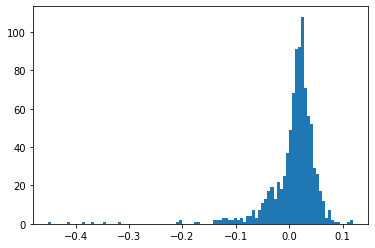

In [48]:
plt.hist(allprofits, bins=100)
plt.show()